In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import sklearn
import matplotlib.pyplot as plt


from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
#from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.ExcelFile('D:\BUE\Last year\ML\Assig.1\Data sets\CTG (1).xls')
Data = pd.read_excel(df ,'Data')
RData = pd.read_excel(df ,'Raw Data')

In [3]:
RData.head()


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [4]:
RData.isna().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [5]:
RData.dropna(inplace=True)
RData.isna().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

<h1>Cardiotocography Data Set</h1>

<h2>Attribute Information:</h2>

<li>LB - FHR baseline (beats per minute)
<li>AC - # of accelerations per second
<li>FM - # of fetal movements per second
<li>UC - # of uterine contractions per second
<li>DL - # of light decelerations per second
<li>DS - # of severe decelerations per second
<li>DP - # of prolongued decelerations per second
<li>ASTV - percentage of time with abnormal short term variability
<li>MSTV - mean value of short term variability
<li>ALTV - percentage of time with abnormal long term variability
<li>MLTV - mean value of long term variability
<li>Width - width of FHR histogram
<li>Min - minimum of FHR histogram
<li>Max - Maximum of FHR histogram
<li>Nmax - # of histogram peaks
<li>Nzeros - # of histogram zeros
<li>Mode - histogram mode
<li>Mean - histogram mean
<li>Median - histogram median
<li>Variance - histogram variance
<li>Tendency - histogram tendency
<li>CLASS - FHR pattern class code (1 to 10)
<li>NSP - fetal state class code (N=normal; S=suspect; P=pathologic)


<h2>Data Set Information:</h2>
<p>
2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.</p>

In [6]:
RData = RData.drop(['FileName','Date','SegFile','b','e','LBE'] , axis=1)
RData = RData.drop(['E'] , axis=1)

#Dropoed the above columns becuse we are not going to use them and are not going to benfit our mpdel 

In [7]:
RData = RData.drop(['A','B','C','D','SUSP','DE','LD','FS'] , axis=1)

<h1> Checking for Outliers </h1>
<h2>Using IQR Method</h2>
<p>The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. Any data out of this range is considered an outlier</p>

In [8]:
Q1 = RData.quantile(0.25)
Q3 = RData.quantile(0.75)
IQR = Q3 - Q1

In [9]:
print(IQR)

LB          14.0
AC           4.0
FM           2.0
UC           4.0
ASTV        29.0
MSTV         1.0
ALTV        11.0
MLTV         6.2
DL           3.0
DS           0.0
DP           0.0
DR           0.0
Width       63.0
Min         53.0
Max         22.0
Nmax         4.0
Nzeros       0.0
Mode        19.0
Mean        20.0
Median      19.0
Variance    22.0
Tendency     1.0
AD           0.0
CLASS        5.0
NSP          0.0
dtype: float64


### IQR Score Method

**<br>The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. The first line of code below removes outliers based on the IQR range and stores the result in the data frame 'df_out'. The second line prints the shape of this data**

In [10]:
print(RData.shape)

(2126, 25)


In [11]:
df_out = RData[~((RData < (Q1 - 1.5 * IQR)) |(RData > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
print(df_out.shape)

(701, 25)


In [13]:
print(df_out)

         LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...  Nmax  \
5     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...   9.0   
50    158.0  6.0  0.0  9.0  27.0   1.7   0.0  14.9  1.0  0.0  ...   7.0   
51    158.0  4.0  0.0  6.0  29.0   1.3   0.0  12.8  0.0  0.0  ...   4.0   
60    144.0  5.0  0.0  4.0  33.0   1.1   0.0   6.2  0.0  0.0  ...   5.0   
61    146.0  4.0  0.0  4.0  39.0   0.9  18.0   5.2  0.0  0.0  ...   5.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...   ...   
2114  136.0  0.0  1.0  4.0  67.0   1.5  11.0   4.7  0.0  0.0  ...   4.0   
2118  140.0  0.0  0.0  6.0  79.0   0.3  20.0   8.5  0.0  0.0  ...   1.0   
2119  140.0  0.0  0.0  7.0  79.0   0.5  26.0   7.0  1.0  0.0  ...   1.0   
2120  140.0  0.0  0.0  6.0  79.0   0.6  27.0   6.4  1.0  0.0  ...   1.0   
2121  140.0  0.0  0.0  4.0  77.0   0.7  17.0   6.0  1.0  0.0  ...   2.0   

      Nzeros   Mode   Mean  Median  Variance  Tendency   AD  CLASS  NSP  
5        0.0  137.0  136.

<function matplotlib.pyplot.show(close=None, block=None)>

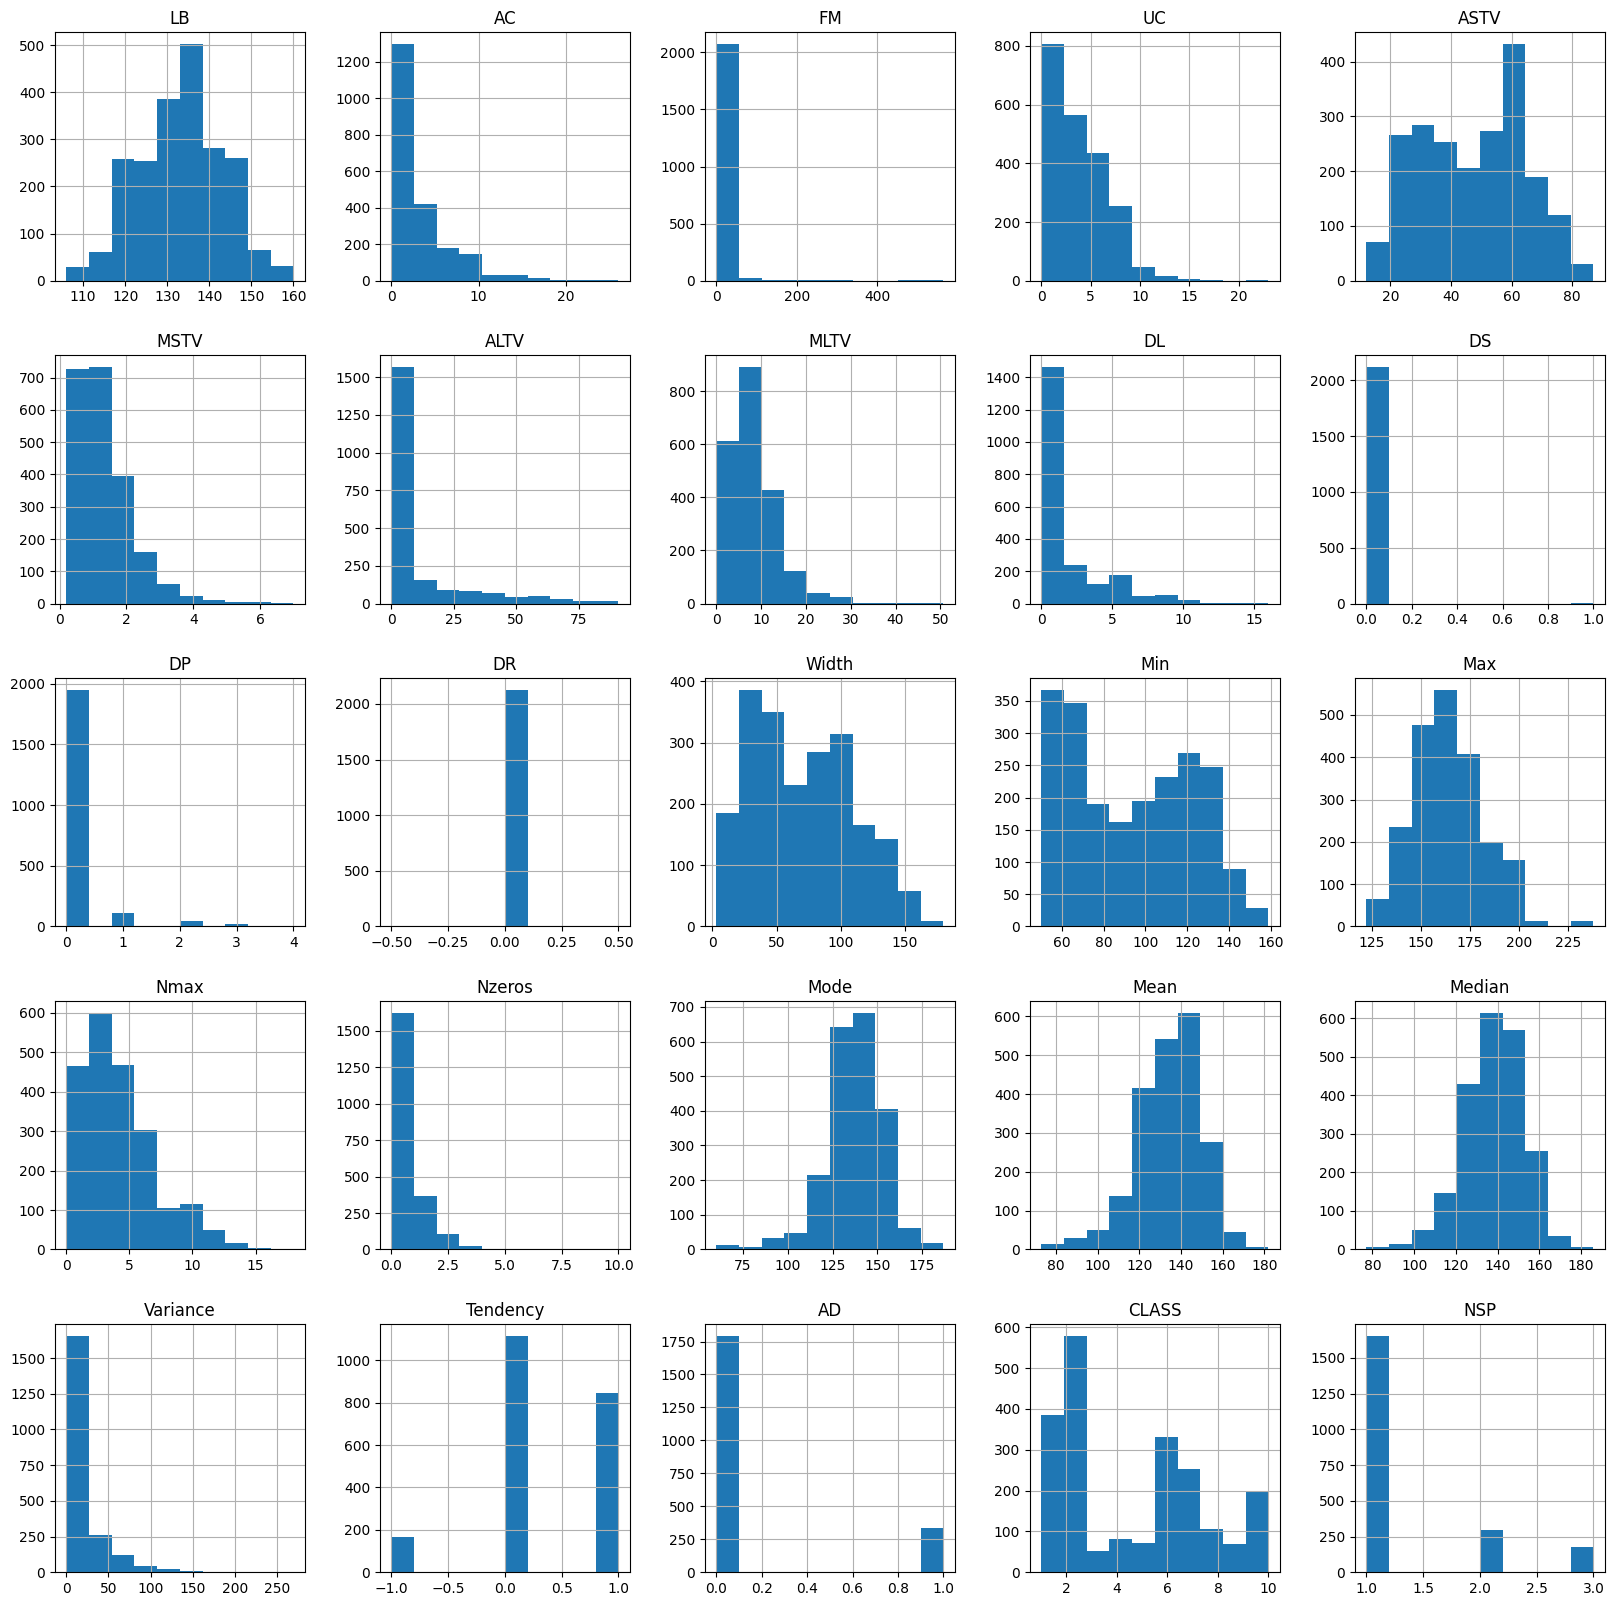

In [14]:
RData.hist(figsize=(20,20))
plt.show

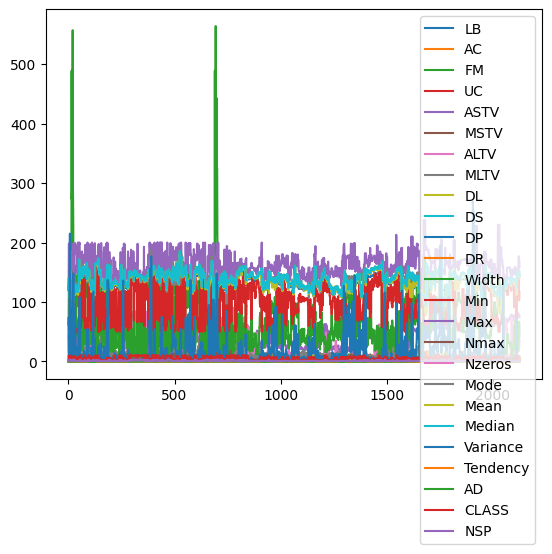

In [15]:
RData.plot()
plt.show()

As shown above the FM may seen as an outlier but its beause the baby movment is either 0 or any other diffrent number 

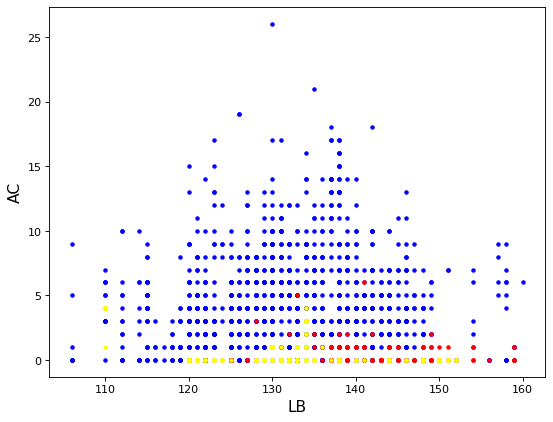

In [16]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax= fig.add_subplot(111)
cond = [(1,'Blue', 'Normal'),(2,'Red','Suspect'),(3,'Yellow', 'Pathologic')]
plt.xlabel('LB',fontsize=14)
plt.ylabel('AC',fontsize=14)

for x,color,action in cond:
    xs = RData.loc[RData['NSP'] == x]['LB']
    ys = RData.loc[RData['NSP'] == x]['AC']
    ax.scatter(xs, ys, c=color, marker='.', label=action)
plt.show()

<h2>spliting dataframe 

In [17]:
x = RData.drop(['NSP','CLASS'], axis=1)
y = RData['NSP']

In [18]:
x.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,AD
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0


<h2> Spliting dataframe into training and testing  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


<h2> installing mlxtend

In [20]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


<h2>Feature Selection</h2>
going to use Step Forward Feature Selection (SFS) 

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
sfs=SequentialFeatureSelector(knn,n_features_to_select=0.7)
sfs.fit(X_train,y_train)
sfs.get_support()

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True, False, False,  True,  True])

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(KNeighborsClassifier(n_neighbors=4),
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    4.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    4.1s finished

[2022-11-12 19:42:43] Features: 1/7 -- score: 0.7992424242424242[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2022-11-12 19:42:43] Features: 2/7 -- score: 0.8509936712604247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished

[2022-11-12 19:42:44] Features: 3/7 -- score: 0.8721658681808324[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | 

In [23]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
1,"(5,)",0.799242
2,"(5, 10)",0.850994
3,"(0, 5, 10)",0.872166
4,"(0, 1, 5, 10)",0.882359
5,"(0, 1, 4, 5, 10)",0.88942
6,"(0, 1, 4, 5, 10, 19)",0.910592
7,"(0, 1, 4, 5, 8, 10, 19)",0.913729


In [24]:
sfs.k_feature_names_

('LB', 'AC', 'ASTV', 'MSTV', 'DL', 'DP', 'Median')

In [25]:
sfs.k_feature_idx_

(0, 1, 4, 5, 8, 10, 19)

In [26]:
sfs.k_score_

0.9137290274245382

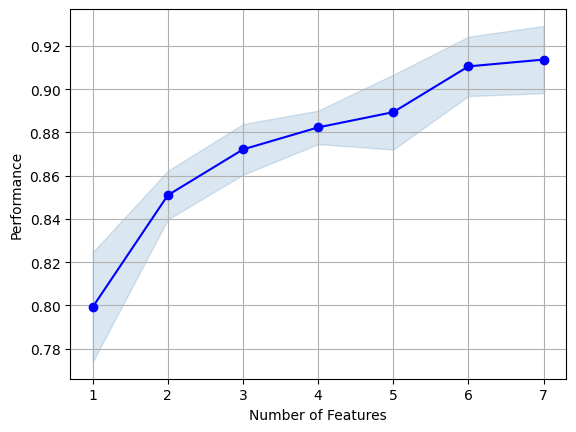

In [27]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()

<h2> Models will be used </h2>
<li>K-nearest neighbor
<li>Multiclass classification
<li>Logistic Regression


<h2>K-nearest neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

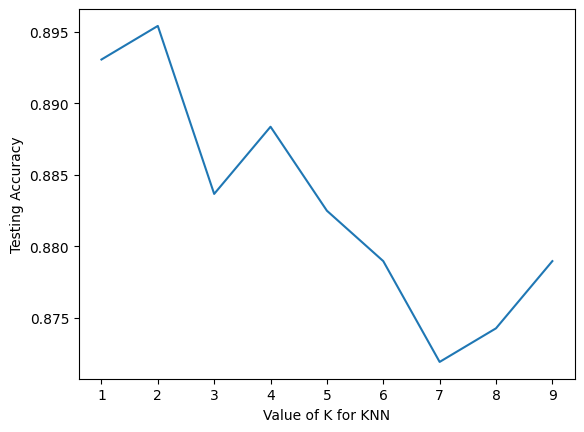

In [29]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [30]:
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [31]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.942
Accuracy on test set: 0.895


<h2>Learning Curve

In [32]:
train_sizes, train_scores, test_scores =\
learning_curve(knn, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

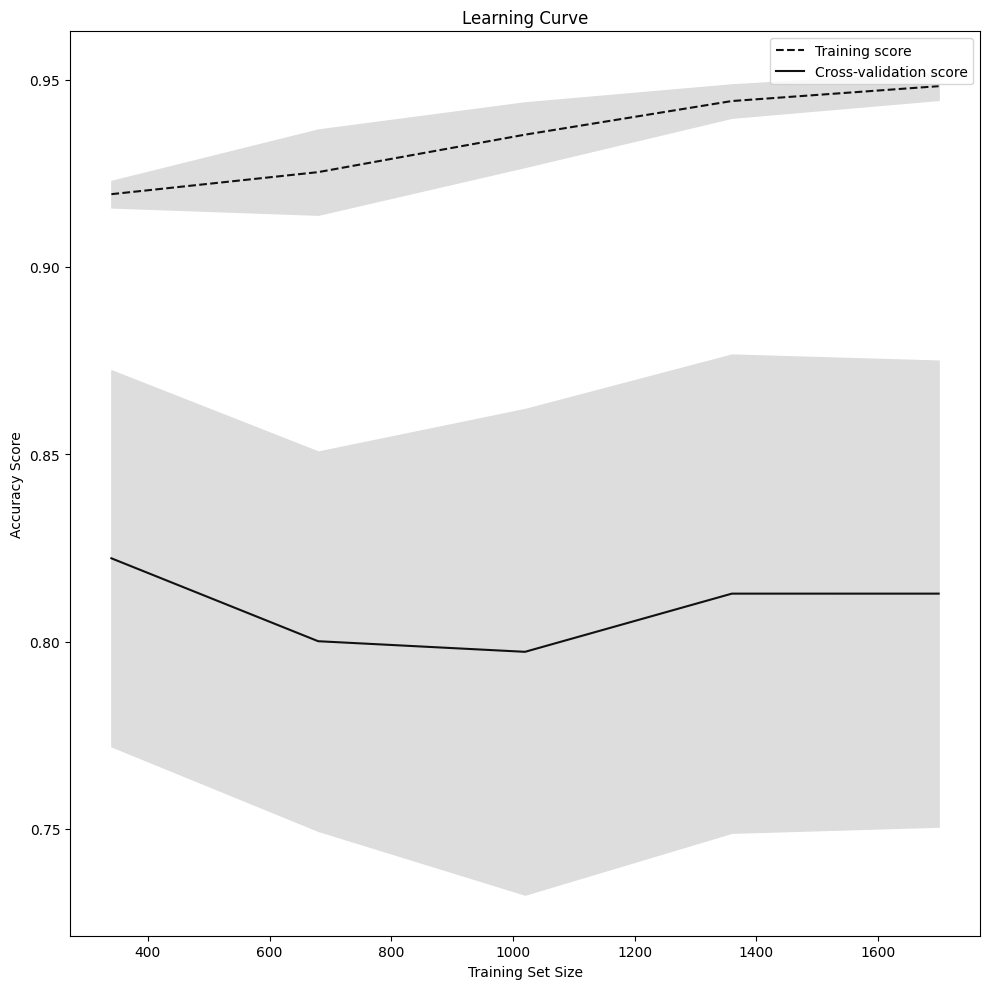

In [33]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

<h2> Classification report for K-nearest neighbor

In [34]:
target_names = ['Normal','Suspect','Pathologic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       673
     Suspect       0.67      0.53      0.59       120
  Pathologic       0.82      0.72      0.77        58

    accuracy                           0.88       851
   macro avg       0.80      0.74      0.77       851
weighted avg       0.87      0.88      0.87       851



<h2>Multiclass classifcation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1,15):
    treecf = DecisionTreeClassifier(max_depth=i,random_state=0)
    treecf.fit(X_train, y_train)
    y1_pred = treecf.predict(X_test)
    acc_train = treecf.score(X_train, y_train)
    acc_test = treecf.score(X_test, y_test)
    print("max_depth:{}".format(i))
    print("Traing accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
    print(".....................")


max_depth:1
Traing accuracy:0.816 
Testing accuracy:0.8378378378378378
.....................
max_depth:2
Traing accuracy:0.879 
Testing accuracy:0.8707403055229143
.....................
max_depth:3
Traing accuracy:0.896 
Testing accuracy:0.8977673325499412
.....................
max_depth:4
Traing accuracy:0.919 
Testing accuracy:0.9071680376028202
.....................
max_depth:5
Traing accuracy:0.943 
Testing accuracy:0.9259694477085781
.....................
max_depth:6
Traing accuracy:0.955 
Testing accuracy:0.9247943595769683
.....................
max_depth:7
Traing accuracy:0.968 
Testing accuracy:0.9294947121034077
.....................
max_depth:8
Traing accuracy:0.976 
Testing accuracy:0.9353701527614571
.....................
max_depth:9
Traing accuracy:0.980 
Testing accuracy:0.9318448883666275
.....................
max_depth:10
Traing accuracy:0.987 
Testing accuracy:0.9377203290246768
.....................
max_depth:11
Traing accuracy:0.991 
Testing accuracy:0.93889541715628

## Based on the above accuracy traning the best accuracey is when max_depth = 11 with esting accuracy:0.9388954171562868

In [37]:
treecf = DecisionTreeClassifier(max_depth=11,random_state=0)
treecf.fit(X_train, y_train)
y1_pred = treecf.predict(X_test)
    

<h3>Confusion matrix

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


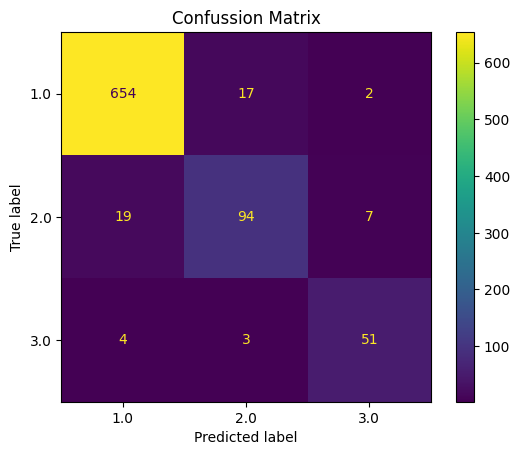

In [38]:
plot_confusion_matrix(treecf, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

<h3> Learning Curve

In [39]:
from sklearn.model_selection import learning_curve

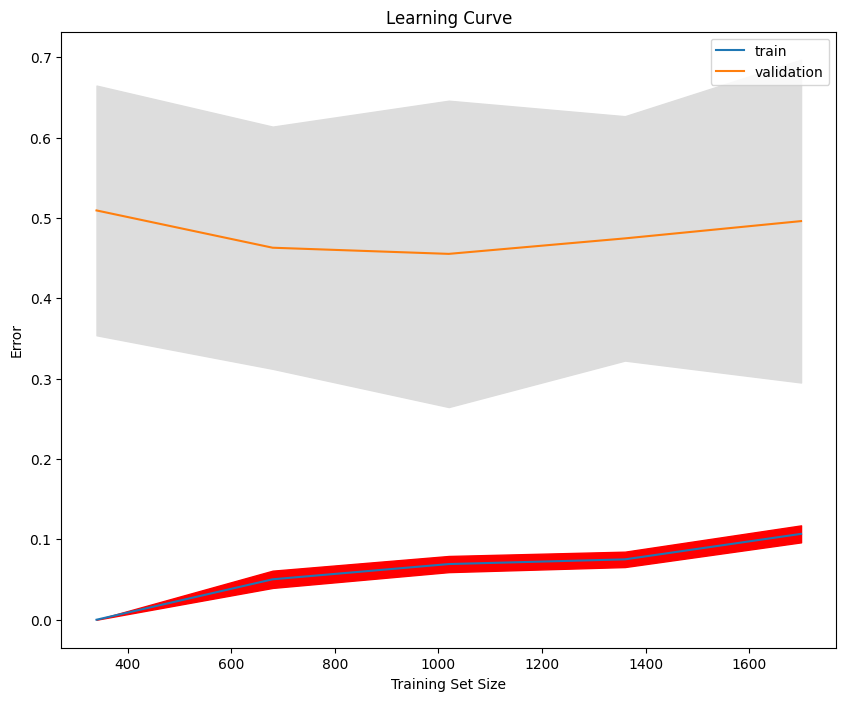

In [40]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=treecf,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

<h2> Classification report for Multiclass classifcation

In [41]:
target_names = ['Normal','Suspect','Pathologic']
print(classification_report(y_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.97      0.97      0.97       673
     Suspect       0.82      0.78      0.80       120
  Pathologic       0.85      0.88      0.86        58

    accuracy                           0.94       851
   macro avg       0.88      0.88      0.88       851
weighted avg       0.94      0.94      0.94       851



<h2>Logistic Regression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8883666274970623, 0.8871915393654524, 0.8918918918918919, 0.8766157461809636, 0.8789659224441834]


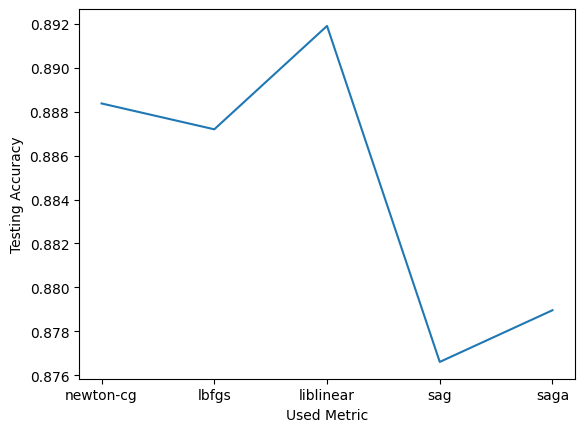

In [43]:
from sklearn.linear_model import LogisticRegression
Sols = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for s in Sols:
    l = LogisticRegression(random_state=42,solver=s, max_iter=10000).fit(X_train, y_train)
    y_pred = l.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
  
print(scores)
plt.plot(Sols, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()

In [44]:
lr = LogisticRegression(random_state=42,solver='liblinear', max_iter=10000).fit(X_train, y_train)
lr.score(X_test, y_test)

0.8918918918918919

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


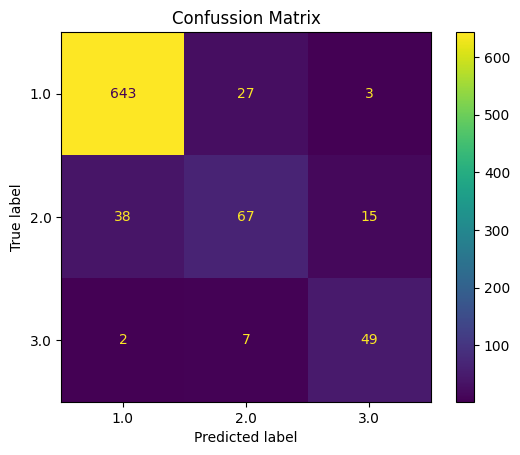

In [45]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

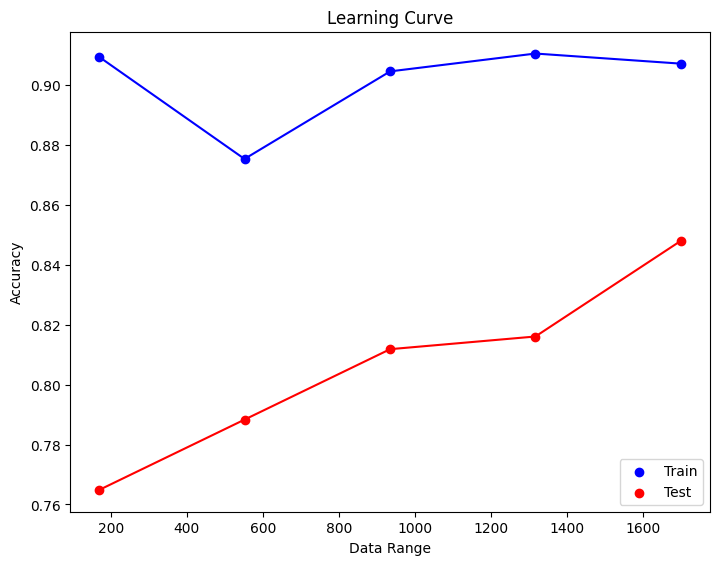

In [46]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

In [47]:
target_names = ['Normal','Suspect','Pathologic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.94      0.94      0.94       673
     Suspect       0.62      0.58      0.60       120
  Pathologic       0.71      0.83      0.76        58

    accuracy                           0.88       851
   macro avg       0.76      0.78      0.77       851
weighted avg       0.88      0.88      0.88       851

